# Final Project - Impact of Testing on COVID-19 

<p>The SARS-CoV-2 (COVID-19) pandemic is currently spreading across the globe with millions of people infected by this potentially deadly virus. The United States has lagged particularly behind other nations in controlling the spread of COVID-19 with nearly 2 million people infected. The state of New York is the most affected state in the entire country with a leading number of cases of the virus. Using data provided by health officials, we will conduct an analysis on the impact testing may have on our handling of the pandemic.</p>

In [390]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import sys

## Retrieving and Tidying Data

In [391]:
url_one = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
url_two = 'https://raw.githubusercontent.com/davidally/python-notebooks/master/Coronavirus%20Tests.csv'
data_one = pd.read_csv(url_one)
data_two = pd.read_csv(url_two)

<p>Source: NYC Health Daily Test https://www1.nyc.gov/site/doh/covid/covid-19-data.page </p>

<p>Source: New York Times COVID database https://github.com/nytimes/covid-19-data </p>

### Extract and prepare the data

<i>New York state has the highest number of COVID-19 cases so we will extract that data and analyze it.</i>

In [392]:
#Extract and reindex the data
set_one = data_one[data_one['state'] == 'New York'].copy()

#Check if any values are missing
set_one.isnull().values.any()
set_two.isnull().values.any()

False

<i>Drop rows without corresponding virus testing data so the tables are in sync with each other.</i>

In [393]:
#Convert date column to proper data type for both sets
set_one['date'] = set_one['date'].apply(pd.to_datetime)
set_two['DATE'] = set_two['DATE'].apply(pd.to_datetime)

#Align dates on both tables and reindex
set_one = set_one.drop([246,261,4117,4172])
set_one.reset_index(drop=True, inplace=True)

<i>Merge the testing data into cases/deaths set to create a single table.</i>

In [394]:
set_one[['Number of tests','Number of positives']] = set_two[['Number of tests','Number of positives']]
set_one

,date,state,fips,cases,deaths,Number of tests,Number of positives
0,2020-03-03,New York,36,2,0,13,1
1,2020-03-04,New York,36,11,0,32,5
2,2020-03-05,New York,36,22,0,65,4
3,2020-03-06,New York,36,44,0,83,7
4,2020-03-07,New York,36,89,0,66,8
...,...,...,...,...,...,...,...
69,2020-05-11,New York,36,342267,27003,17934,1988
70,2020-05-12,New York,36,343705,27282,19624,2061
71,2020-05-13,New York,36,345828,27448,19517,1991
72,2020-05-14,New York,36,348192,27617,15426,1530


## Data analysis

<p>We want to see how the use of testing has impacted deaths over time so lets plot the data.</p>

Text(0, 0.5, 'People Affected')

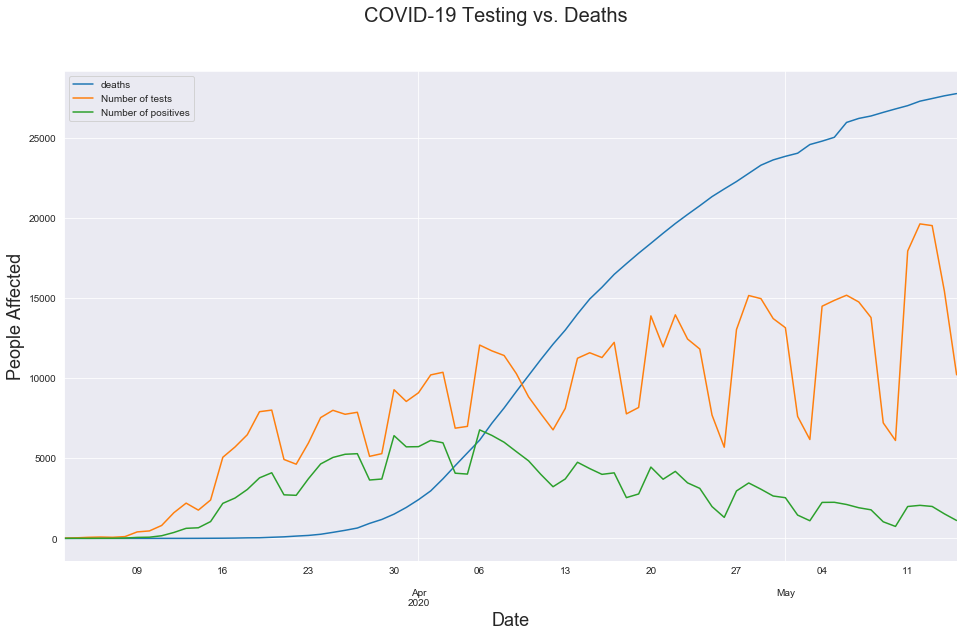

In [395]:
# Draw line plot of all parameters
sb.set_style('darkgrid')
set_one.plot(x='date', y=['deaths', 'Number of tests', 'Number of positives'], figsize=(16,9), grid=True)
plt.suptitle('COVID-19 Testing vs. Deaths', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('People Affected', fontsize=18)

### Normalize and analyze values

<p>While we can see a small correlation between deaths and number of tests increasing, we want to take a closer look with a more precise measurement so we should normalize the data and conduct a statistical analysis.</p>

In [396]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

TARGET = set_one['Number of tests'].to_numpy()
DEATHS = set_one['deaths'].to_numpy()
POSITIVES = set_one['Number of positives'].to_numpy()
CASES = set_one['cases'].to_numpy()

#Reshape data to be scaled
tgt = TARGET.reshape(-1, 1)
dth = DEATHS.reshape(-1, 1)
pos = POSITIVES.reshape(-1, 1)
cse = CASES.reshape(-1, 1)

#Scale the data
#Cases vs. Tests
X, y = scale(cse), tgt
LinReg = LinearRegression(normalize=True)
LinReg.fit(X,y)

print(LinReg.score(X,y))

0.5981557714719843


In [397]:
#Deaths vs. Tests
Y, z = scale(dth), tgt
LinReg.fit(Y,z)

print(LinReg.score(Y,z))

0.5430927093559803


## Preliminary Conclusions

<p>According to the plot and statistical analysis of the values we can see that there is a significant relationship between tests being administered and the amount of confirmed deaths being reported due to COVID-19. Besides the relationship the variables (cases, deaths) have to testing their significance also correlates to each other. This tells us that theres a good chance the more tests are being administered, the more cases of COVID-19 are being caught along with detection of those who have died from the disease. 

This implies that the best way to stay informed about this disease is to conduct as many tests as possible. It is very likely that there are many outbreaks and deaths occurring undetected due to the lack of testing. The data shows us that testing is nowhere near the scale it needs to be.</p>